In [1]:
import NeuroAnalysisTools
import NeuroAnalysisTools.core.FileTools as ft
import NeuroAnalysisTools.RetinotopicMapping as rm
import os
import tifffile as tf
from os.path import join as pjoin
import numpy as np
from scipy.ndimage import gaussian_filter,median_filter
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
# load data

# path = r'Y:\WF_WRX\P42\20240726\DOM\1_Retinotopy\process\20240726-170926-retinotopy'
path = '/home/wrx/Data_WF/WF_WRX/P42/20240726/saline/1_Retinotopy/process/20240726-154732-retinotopy'

altitude_map = np.load(pjoin(path,'phase_el.npy'))
azimuth_map = np.load(pjoin(path,'phase_az.npy'))
altitude_power_map = np.load(pjoin(path,'mag_el.npy'))
azimuth_power_map = np.load(pjoin(path,'mag_az.npy'))
vasculature_map = np.load(path[:-10]+r'wfield/frames_average.npy')[0]

In [3]:
altitude_power_map = median_filter(altitude_power_map, 5)
azimuth_power_map = median_filter(azimuth_power_map, 5)

# Defining image analysis parameters
#### This is probably the most important part of the whole analysis! The 14 parameters below define the final segmentation results.

phaseMapFilterSigma: The sigma value (in pixels) of Gaussian filter for altitude and azimuth maps. FLOAT, default = 1.0, recommended range: [0.0, 2.0]. Large "phaseMapFilterSigma" gives you more patches. Small "phaseMapFilterSigma" gives you less patches.

signMapFilterSigma: The sigma value (in pixels) of Gaussian filter for visual sign maps. FLOAT, default = 9.0, recommended range: [0.6, 10.0]. Large "signMapFilterSigma" gives you less patches. Small "signMapFilterSigma" gives you more patches.

signMapThr: Threshold to binarize visual signmap. FLOAT, default = 0.35, recommended range: [0.2, 0.5], allowed range: [0, 1). Large signMapThr gives you fewer patches. Smaller signMapThr gives you more patches.

closeIter: Binary close iteration for each raw patches. INT, default = 3. You do not want to change this parameter very often.

openIter: Binary open iteration for each raw patches. INT, default = 3. You do not want to change this parameter very often

dilationIter: Binary dilation iteration for each raw patches. INT, default = 15. You do not want to change this parameter very often.

borderWidth: Pixel number between adjcent patches. INT, default = 1. You do not want to change this parameter very often.

smallPatchThr: The patches with pixel number below smallPatchThr will be discarded. INT, default = 100. You do not want to change this parameter very often.

eccMapFilterSigma: The sigma value of Gaussian filter for eccentricity maps. FLOAT, default = 10.0. You do not want to change this parameter very often.

visualSpacePixelSize: The pixel size for patch to visual space mapping. FLOAT, default = 0.5. You do not want to change this parameter very often.

visualSpaceCloseIter: The binary iteration for visual space coverage for each patch. INT, default = 15. You do not want to change this parameter very often.

splitLocalMinCutStep: The step width for detecting number of local minimums during spliting. The local minimums detected will be used as marker in the following open cv watershed segmentation. FLOAT, default = 5.0, recommend range: [0.5, 15.0]. Small "splitLocalMinCutStep" will make it more likely to split but into less sub patches. Large "splitLocalMinCutStep" will make it less likely to split but into more sub patches.

splitOverlapThr: Patches with overlap ration larger than this value will go through the split procedure. FLOAT, default = 1.1, recommend range: [1.0, 1.2], should be larger than 1.0. Small "splitOverlapThr" will split more patches. Large "splitOverlapThr" will split less patches.

mergeOverlapThr: Considering a patch pair (A and B) with same sign, A has visual coverage a deg2 and B has visual coverage b deg2 and the overlaping visual coverage between this pair is c deg2. Then if (c/a < "mergeOverlapThr") and (c/b < "mergeOverlapThr"), these two patches will be merged. FLOAT, default = 0.1, recommend range: [0.0, 0.2], should be smaller than 1.0. Small "mergeOverlapThr" will merge less patches. Large "mergeOverlapThr" will merge more patches.

In [4]:
# import pickle
# with open(pjoin(path,'retinotopy_out.pkl'), 'rb') as f:
#     data = pickle.load(f)
#     
# data['params']
# data.keys()

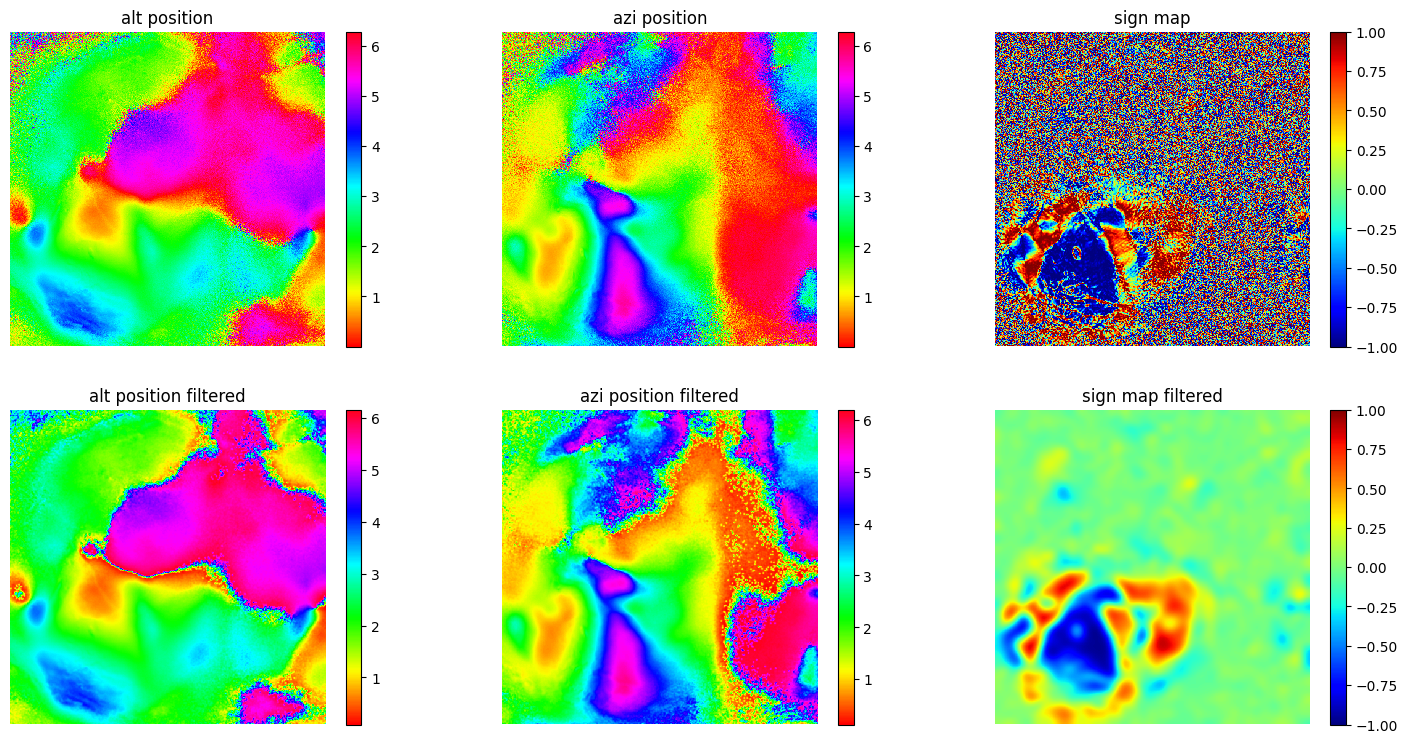

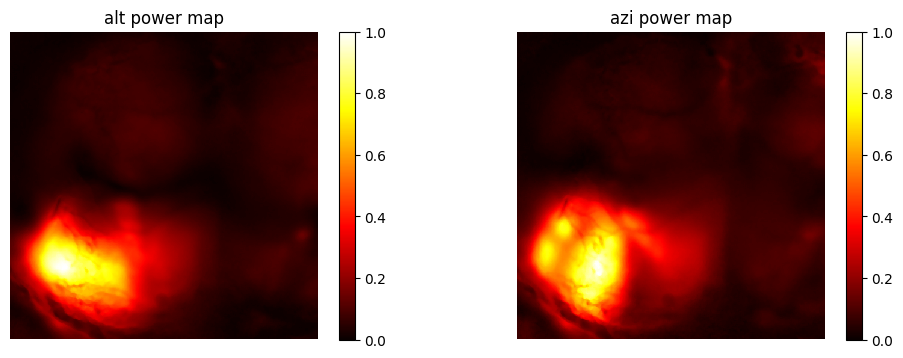

In [5]:
params = {
          'phaseMapFilterSigma': 1,
          'signMapFilterSigma': 8,
          'signMapThr': 0.35,
          'eccMapFilterSigma': 15,
          'splitLocalMinCutStep': 5,
          'closeIter': 3,
          'openIter': 3,
          'dilationIter': 15,
          'borderWidth': 1,
          'smallPatchThr': 100,
          'visualSpacePixelSize': 0.5,
          'visualSpaceCloseIter': 15,
          'splitOverlapThr': 1.1,
          'mergeOverlapThr': 0.1
          }

# Creating the RetinotopicMappingTrail object
trial = rm.RetinotopicMappingTrial(altPosMap=altitude_map,
                                   aziPosMap=azimuth_map,
                                   altPowerMap=altitude_power_map,
                                   aziPowerMap=azimuth_power_map,
                                   vasculatureMap=vasculature_map,
                                   mouseID='P42',
                                   dateRecorded='20240726',
                                   comments='',
                                   params=params)

# Generating visual sign map

trial._getSignMap(isPlot=True, isReverse=False, isFixedRange=False)
plt.show()

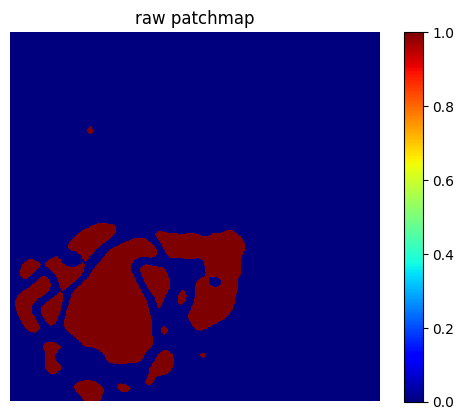

In [6]:
# Binarizing filtered visual signmap

trial._getRawPatchMap(isPlot=True)
plt.show()

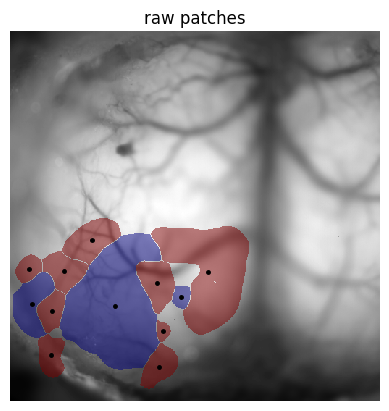

In [7]:
# Generating raw patches

trial._getRawPatches(isPlot=True)
plt.show()

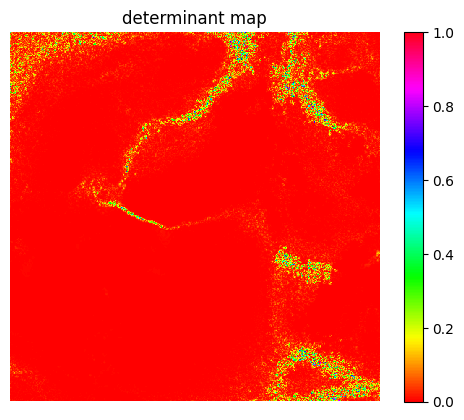

In [8]:
# Generating determinant map

trial._getDeterminantMap(isPlot=True)
plt.show()

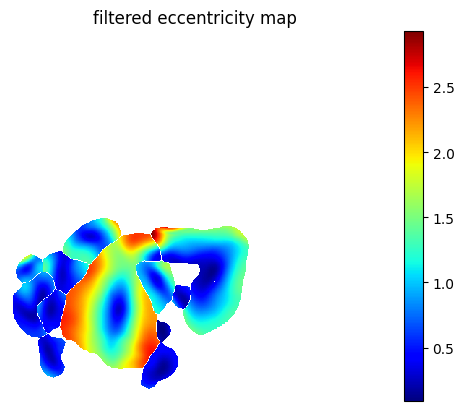

In [9]:
# Generating eccentricity map for each patch

trial._getEccentricityMap(isPlot=True)
plt.show()

patch01AU=18.0 AS=16.750032855483187 ratio=0.930557380860177
patch02AU=15.75 AS=13.176039505441516 ratio=0.8365739368534295
patch03AU=6.25 AS=3.497275537008093 ratio=0.5595640859212948
patch04AU=3.75 AS=2.277610682106572 ratio=0.6073628485617525
patch05AU=6.25 AS=3.338324956977494 ratio=0.534131993116399
patch06AU=2.75 AS=1.2816089888458426 ratio=0.4660396323075791
patch07AU=2.25 AS=0.8835526799258338 ratio=0.3926900799670372
patch08AU=2.75 AS=1.45987083755824 ratio=0.5308621227484509
patch09AU=2.5 AS=0.7515252997030288 ratio=0.30061011988121156
patch10AU=5.5 AS=2.4414368670751214 ratio=0.44389761219547663
patch11AU=1.25 AS=0.3448054353352633 ratio=0.27584434826821064
patch12AU=0.5 AS=0.06717182410168593 ratio=0.13434364820337186


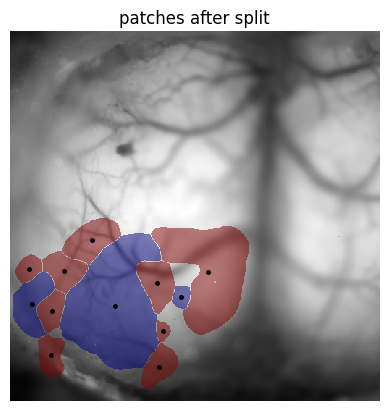

In [10]:
# Splitting overlapping patches

trial._splitPatches(isPlot=True)
plt.show()

merge iteration: 1


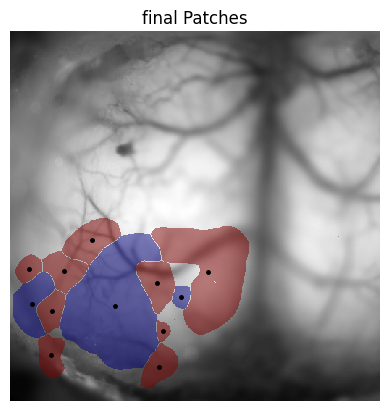

In [11]:
# Merging non-overlapping patches

trial._mergePatches(isPlot=True)
plt.show()

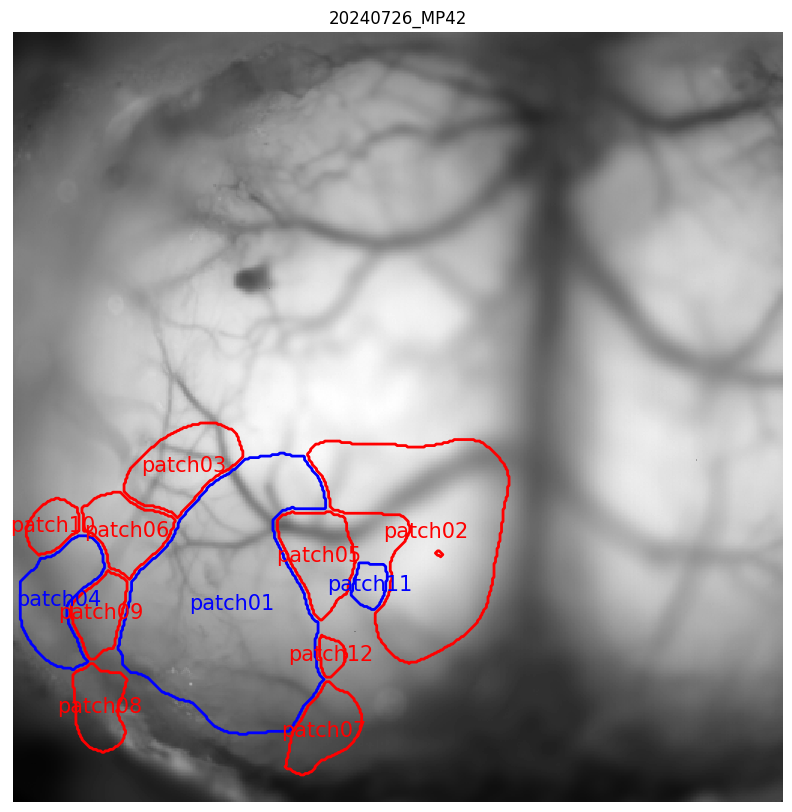

In [12]:
# Plotting results

trial.plotFinalPatchBorders2()
plt.show()

In [13]:
# Annotating segmented patches

names = [
        ['patch01', 'V1'],
        ['patch03', 'RL'],
        ['patch04', 'LI'],
        ['patch05', 'PM'],
        ['patch06', 'AL'],
        # ['patch07', 'P'],
        ['patch08', 'P'],
        ['patch09', 'LM'],
        ['patch10', 'LLA'],
        ['patch11', 'MMP'],
        ['patch12', 'M'],
        ]

finalPatchesMarked = dict(trial.finalPatches)

for i, namePair in enumerate(names):
    currPatch = finalPatchesMarked.pop(namePair[0])
    newPatchDict = {namePair[1]:currPatch}
    finalPatchesMarked.update(newPatchDict)

# remove patches that are not named
keys = list(finalPatchesMarked.keys())
for key in keys:
    if key[:-2] == 'patch':
        finalPatchesMarked.pop(key)
    
trial.finalPatchesMarked = finalPatchesMarked

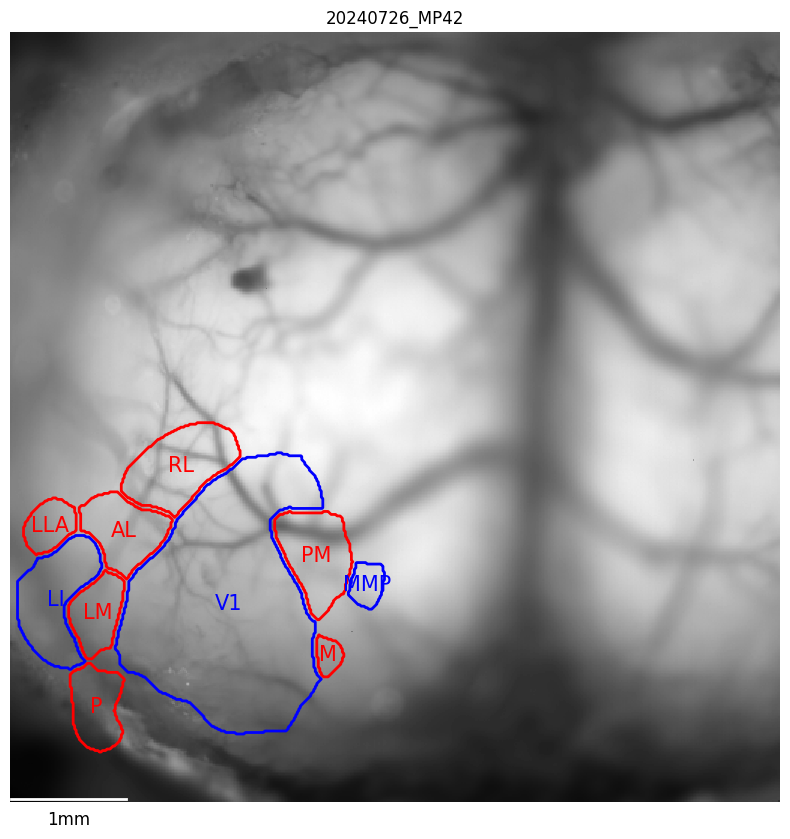

In [14]:
# Ploting final results

trial.plotFinalPatchBorders2(pixel_um=13)
plt.savefig(os.path.join(path, 'visual_areas.png'), dpi=300, bbox_inches='tight')
plt.show()


In [15]:
# Generating dictionary for saving

trialDict = trial.generateTrialDict()
trialDict.keys()

dict_keys(['mouseID', 'dateRecorded', 'altPosMap', 'aziPosMap', 'altPowerMap', 'aziPowerMap', 'vasculatureMap', 'comments', 'params', 'altPosMapf', 'aziPosMapf', 'altPowerMapf', 'aziPowerMapf', 'signMap', 'signMapf', 'rawPatchMap', 'eccentricityMapf', 'finalPatches', 'finalPatchesMarked'])

In [19]:
path = '/home/wrx/Data_WF/WF_WRX/P42/20240726/saline/1_Retinotopy/process/20240726-154732-wfield'
U = np.load(pjoin(path, 'U.npy'))
SVTcorr = np.load(pjoin(path, 'SVTcorr.npy'))

(512, 512, 200)
(200, 7997)


In [36]:
print('Reconstructing movement...')
dims = U.shape[:2]
move = U.dot(SVTcorr).reshape((*dims,-1)).transpose(-1,0,1).squeeze() # SVTcorr[:,:100]
print(move.shape)

print('Extracting traces...')
tract_dict = {}
for key, patch in trial.finalPatchesMarked.items():
    trace = patch.getTrace(move)
    tract_dict[key] = trace

(7997, 512, 512)


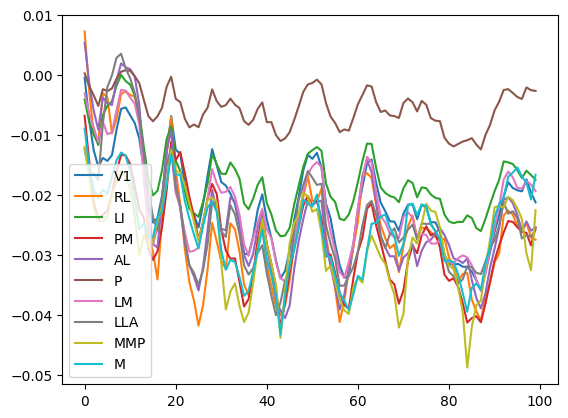

In [29]:
for key, trace in tract_dict.items():
    plt.plot(trace, label=key)

plt.legend()
plt.show()

In [32]:
# Saving results
trialDict['trace'] = tract_dict
ft.saveFile(pjoin(path,'retinotopy_out.pkl'), trialDict)

In [33]:
import pickle
with open(pjoin(path,'retinotopy_out.pkl'), 'rb') as f:
    data = pickle.load(f)
    
print(data['finalPatchesMarked'])

{'V1': <NeuroAnalysisTools.RetinotopicMapping.Patch object at 0x7fb02320ec90>, 'RL': <NeuroAnalysisTools.RetinotopicMapping.Patch object at 0x7fb02320cf80>, 'LI': <NeuroAnalysisTools.RetinotopicMapping.Patch object at 0x7fb02320f380>, 'PM': <NeuroAnalysisTools.RetinotopicMapping.Patch object at 0x7fb0267e62a0>, 'AL': <NeuroAnalysisTools.RetinotopicMapping.Patch object at 0x7fb0267e7f80>, 'P': <NeuroAnalysisTools.RetinotopicMapping.Patch object at 0x7fb0267e60f0>, 'LM': <NeuroAnalysisTools.RetinotopicMapping.Patch object at 0x7fb0267e7b00>, 'LLA': <NeuroAnalysisTools.RetinotopicMapping.Patch object at 0x7fb023265250>, 'MMP': <NeuroAnalysisTools.RetinotopicMapping.Patch object at 0x7fb023267f20>, 'M': <NeuroAnalysisTools.RetinotopicMapping.Patch object at 0x7fb023265520>}
